In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
df = pd.read_csv("Train_Data.csv")
dt = pd.read_csv("Test_Data.csv")
ds = pd.read_csv("Sample_Submission.csv")

In [119]:
df

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
0,0,tcp,netbios_dgm,REJ,0,0,0,0,0,0,...,0.06,0.06,0.00,0.00,0.00,0.00,1.00,1.00,21,neptune
1,0,tcp,smtp,SF,1239,400,0,0,0,0,...,0.45,0.04,0.00,0.00,0.11,0.00,0.02,0.00,18,normal
2,0,tcp,http,SF,222,945,0,0,0,0,...,1.00,0.00,0.02,0.03,0.00,0.00,0.00,0.00,21,normal
3,0,tcp,http,SF,235,1380,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal
4,0,tcp,uucp_path,REJ,0,0,0,0,0,0,...,0.01,0.08,0.00,0.00,0.00,0.00,1.00,1.00,19,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86840,0,tcp,http,SF,216,674,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.01,0.00,0.00,21,normal
86841,0,tcp,http,SF,368,1725,0,0,0,0,...,1.00,0.00,0.03,0.05,0.00,0.00,0.13,0.06,20,normal
86842,28,tcp,ftp,SF,1483,4152,0,0,0,30,...,0.28,0.04,0.01,0.00,0.00,0.00,0.00,0.00,20,normal
86843,0,tcp,smtp,SF,1679,385,0,0,0,0,...,0.16,0.08,0.00,0.00,0.69,0.00,0.01,0.00,18,normal


In [120]:
df.wrongfragment.value_counts()

wrongfragment
0    86845
Name: count, dtype: int64

In [121]:
df.urgent.value_counts()

urgent
0    86843
2        1
1        1
Name: count, dtype: int64

In [122]:
df.numfailedlogins.value_counts()

numfailedlogins
0    86796
1       38
3        5
2        5
4        1
Name: count, dtype: int64

In [123]:
df.rootshell.value_counts()

rootshell
0    86728
1      117
Name: count, dtype: int64

In [124]:
df.attack.value_counts()

attack
normal     53847
neptune    32998
Name: count, dtype: int64

In [125]:
df.isguestlogin.value_counts()

isguestlogin
0    86145
1      700
Name: count, dtype: int64

In [126]:
df = df.drop(["land", "wrongfragment", "urgent", "numfailedlogins", "rootshell", "numoutboundcmds", "ishostlogin"], axis=1)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86845 entries, 0 to 86844
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   duration                86845 non-null  int64  
 1   protocoltype            86845 non-null  object 
 2   service                 86845 non-null  object 
 3   flag                    86845 non-null  object 
 4   srcbytes                86845 non-null  int64  
 5   dstbytes                86845 non-null  int64  
 6   hot                     86845 non-null  int64  
 7   loggedin                86845 non-null  int64  
 8   numcompromised          86845 non-null  int64  
 9   suattempted             86845 non-null  int64  
 10  numroot                 86845 non-null  int64  
 11  numfilecreations        86845 non-null  int64  
 12  numshells               86845 non-null  int64  
 13  numaccessfiles          86845 non-null  int64  
 14  isguestlogin            86845 non-null

In [128]:
df.isnull().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
hot                       0
loggedin                  0
numcompromised            0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportrate    0
dsthostsrvdiffhostrate    0
dsthostserrorrate         0
dsthostsrvserrorrate      0
dsthostrerrorrate         0
dsthostsrvrerrorrate      0
lastflag                  0
attack              

In [129]:
df.describe()

,duration,srcbytes,dstbytes,hot,loggedin,numcompromised,suattempted,numroot,numfilecreations,numshells,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,86845.000000,8.684500e+04,8.684500e+04,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,...,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000,86845.000000
mean,104.166872,8.455707e+03,2.732095e+03,0.144971,0.441142,0.320583,0.001267,0.356382,0.014370,0.000357,...,123.338269,0.526457,0.050186,0.075810,0.016246,0.324666,0.318934,0.092391,0.091045,20.060522
std,1038.273538,3.582141e+05,5.543041e+04,1.837958,0.496527,27.993474,0.048450,28.415210,0.528799,0.020072,...,112.704010,0.447353,0.103323,0.208388,0.055271,0.464291,0.463506,0.282768,0.281452,1.421425
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
50%,0.000000,4.600000e+01,4.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,77.000000,0.550000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
75%,0.000000,2.720000e+02,7.680000e+02,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.070000,0.020000,0.010000,1.000000,1.000000,0.000000,0.000000,21.000000
max,40504.000000,8.958152e+07,7.028652e+06,77.000000,1.000000,7479.000000,2.000000,7468.000000,43.000000,2.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [130]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

In [131]:
numeries = df.select_dtypes(include=["int64", "float64"]).columns
categories = df.select_dtypes(include="object").columns

In [132]:
len(numeries)

32

In [133]:
# plt.figure(figsize=(20, 120))
# for (i,j) in zip(numeries, range(1, len(numeries)+1)):
#         plt.subplot(16, 2, j)
#         sns.boxplot(df[i])

In [134]:
categories = ['protocoltype', 'service', 'flag', 'attack', "isguestlogin", "suattempted"]

In [135]:
numeries = ['duration', 'srcbytes', 'dstbytes', 'hot', 'loggedin', 'numcompromised', 'numroot', 'numfilecreations', 'numshells',
       'numaccessfiles', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate',
       'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'lastflag']

In [144]:
ul = df.dsthostsrvdiffhostrate.quantile(0.90)
ll = df.dsthostsrvdiffhostrate.quantile(0.10)
dff = df[(df["dsthostsrvdiffhostrate"] <= ul) & (df["dsthostsrvdiffhostrate"] >= ll)]
dff

,duration,protocoltype,service,flag,srcbytes,dstbytes,hot,loggedin,numcompromised,suattempted,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
0,0,tcp,netbios_dgm,REJ,0,0,0,0,0,0,...,0.06,0.06,0.00,0.00,0.00,0.00,1.00,1.0,21,neptune
1,0,tcp,smtp,SF,1239,400,0,1,0,0,...,0.45,0.04,0.00,0.00,0.11,0.00,0.02,0.0,18,normal
2,0,tcp,http,SF,222,945,0,1,0,0,...,1.00,0.00,0.02,0.03,0.00,0.00,0.00,0.0,21,normal
3,0,tcp,http,SF,235,1380,0,1,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,21,normal
4,0,tcp,uucp_path,REJ,0,0,0,0,0,0,...,0.01,0.08,0.00,0.00,0.00,0.00,1.00,1.0,19,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86839,0,tcp,http,SF,258,6418,0,1,0,0,...,0.91,0.01,0.00,0.00,0.00,0.00,0.00,0.0,21,normal
86840,0,tcp,http,SF,216,674,0,1,0,0,...,1.00,0.00,0.01,0.03,0.01,0.01,0.00,0.0,21,normal
86842,28,tcp,ftp,SF,1483,4152,30,1,0,0,...,0.28,0.04,0.01,0.00,0.00,0.00,0.00,0.0,20,normal
86843,0,tcp,smtp,SF,1679,385,0,1,0,0,...,0.16,0.08,0.00,0.00,0.69,0.00,0.01,0.0,18,normal


In [145]:
# df["dsthostsrvdiffhostrate"] = np.where(df["dsthostsrvdiffhostrate"] >= ul,
#          ul,
#          np.where(df["dsthostsrvdiffhostrate"] <= ll,
#                   ll,
#                   df["dsthostsrvdiffhostrate"]))

C:\Users\91909\AppData\Local\Temp\ipykernel_36280\1095525807.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dff.dsthostsrvdiffhostrate)


<Axes: xlabel='dsthostsrvdiffhostrate', ylabel='Density'>

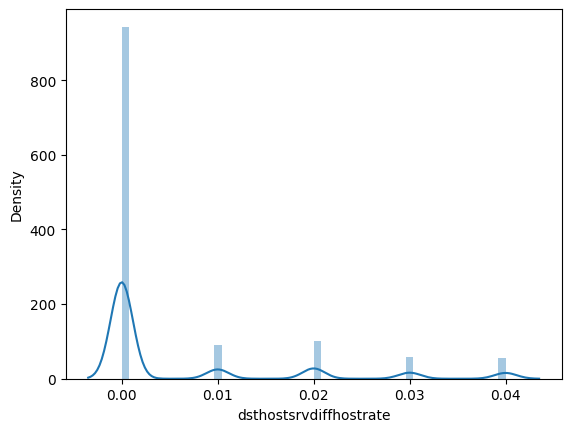

In [146]:
sns.distplot(dff.dsthostsrvdiffhostrate)

In [137]:
df1 = df[(df.srvdiffhostrate < 0.9)]

In [ ]:
df.srvdiffhostrate > 0.9

0        False
1        False
2        False
3        False
4        False
         ...  
86840    False
86841    False
86842    False
86843    False
86844    False
Name: srvdiffhostrate, Length: 86845, dtype: bool

In [ ]:
df1 = df[(df.diffsrvrate < 0.95)]

In [ ]:
df1 = df[(df.numcompromised < 1200)]

In [ ]:
df1 = df[(df.numroot < 1100)]

In [ ]:
df1 = df[(df.hot < 40)]
df1 = df[(df.srcbytes < 4)]
df1 = df[(df.dstbytes < 5)]
df1 = df[(df.duration < 3100)]

In [ ]:
df

,duration,protocoltype,service,flag,srcbytes,dstbytes,hot,loggedin,numcompromised,suattempted,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,attack
0,0,tcp,netbios_dgm,REJ,0,0,0,0,0,0,...,0.06,0.06,0.00,0.00,0.00,0.00,1.00,1.00,21,neptune
1,0,tcp,smtp,SF,1239,400,0,1,0,0,...,0.45,0.04,0.00,0.00,0.11,0.00,0.02,0.00,18,normal
2,0,tcp,http,SF,222,945,0,1,0,0,...,1.00,0.00,0.02,0.03,0.00,0.00,0.00,0.00,21,normal
3,0,tcp,http,SF,235,1380,0,1,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal
4,0,tcp,uucp_path,REJ,0,0,0,0,0,0,...,0.01,0.08,0.00,0.00,0.00,0.00,1.00,1.00,19,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86840,0,tcp,http,SF,216,674,0,1,0,0,...,1.00,0.00,0.01,0.03,0.01,0.01,0.00,0.00,21,normal
86841,0,tcp,http,SF,368,1725,0,1,0,0,...,1.00,0.00,0.03,0.05,0.00,0.00,0.13,0.06,20,normal
86842,28,tcp,ftp,SF,1483,4152,30,1,0,0,...,0.28,0.04,0.01,0.00,0.00,0.00,0.00,0.00,20,normal
86843,0,tcp,smtp,SF,1679,385,0,1,0,0,...,0.16,0.08,0.00,0.00,0.69,0.00,0.01,0.00,18,normal
